# Pandas Lightning Talk Demo
We will go over how to use pandas to import and process data related to the novel COVID-19 virus

The first step is to import Pandas
Also include matplotlib inline to show graphs in Pandas

Copyright Nick Piacente, Ziam Ghaznavi, David Cayll

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


## Data Source
Johns Hopkins University is compiling COVID-19 data from multiple sources daily.  They publish the raw data on their Github page.  We can find the most recent data at the link below:

https://github.com/CSSEGISandData/COVID-19

We can import the data related to global deaths, confirmed cases, and recovered cases using these links to their data

In [2]:
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

## Bring in data
We can bring in data using the read_csv method.  The data is now contained in a Pandas DataFrame 


In [3]:
deaths = pd.read_csv(deaths_url)
confirmed = pd.read_csv(confirmed_url)

In [4]:
type(deaths)

# also works
#type(confirmed)

pandas.core.frame.DataFrame

### Let's find the most recent date of data

In [5]:
mostRecentDate = deaths.columns[-1] # gets the columns of the matrix

In [6]:
mostRecentDate

'3/25/20'

### The (minimally processed) DataFrame can be seen below
Sorted by confirmed count max at the latest date

In [7]:
# formatting for Jupyter Notebook
pd.options.display.max_columns = 13
pd.options.display.max_rows = 30

# try 'confirmed', deaths'
data = confirmed

# show the data frame
data.sort_values(by=mostRecentDate, ascending = False)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
137,NaN,Italy,43.0000,12.0000,0,0,...,47021,53578,59138,63927,69176,74386
62,Hubei,China,30.9756,112.2707,444,444,...,67800,67800,67800,67800,67801,67801
225,NaN,US,37.0902,-95.7129,1,1,...,19100,25489,33276,43847,53740,65778
201,NaN,Spain,40.0000,-4.0000,0,0,...,20410,25374,28768,35136,39885,49515
120,NaN,Germany,51.0000,9.0000,0,0,...,19848,22213,24873,29056,32986,37323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Montserrat,United Kingdom,16.7425,-62.1874,0,0,...,1,1,1,1,1,1
199,NaN,Somalia,5.1521,46.1996,0,0,...,1,1,1,1,1,1
231,Diamond Princess,Canada,0.0000,0.0000,0,0,...,0,0,0,0,0,0
238,Recovered,Canada,0.0000,0.0000,0,0,...,0,0,0,0,0,0


## Adding Filters can make the data more meaningful
Let's process the DataFrame to show confirmed cases by date for the top 20 countries

We won't use the Lat/Long data, and need to group the data by country

In [8]:
countryFrames = data.drop(['Lat','Long'], axis=1)

In [9]:
# save this index variable to save the order.
index = countryFrames.columns.drop(['Province/State']) 

### The pivot_table method will eliminate duplicate entries from Countries with more than one city

In [10]:
# unintended consequence of incorrect sorting and date order
countryFrames.pivot_table(index = 'Country/Region', aggfunc = sum)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Country/Region,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,...,1,1,1,1,4,4
Albania,0,0,0,0,0,0,...,0,0,0,0,0,2
Algeria,0,0,0,0,0,0,...,12,12,17,17,19,20
Andorra,0,0,0,0,0,0,...,1,1,1,1,1,1
Angola,0,0,0,0,0,0,...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0,0,0,0,0,0,...,0,0,0,0,0,0
Venezuela,0,0,0,0,0,0,...,0,0,0,0,0,0
Vietnam,0,2,2,2,2,2,...,16,16,16,18,30,30


In [11]:
# formatting using a variety of methods to process and sort data
finalFrame = countryFrames.transpose().reindex(index).transpose().set_index('Country/Region').sort_values(by=mostRecentDate, ascending=False).transpose()

In [12]:
finalFrame

Country/Region,Italy,China,US,Spain,Germany,Iran,...,Libya,United Kingdom,Somalia,Canada,Canada,The West Bank and Gaza
1/22/20,0,444,1,0,0,0,...,0,0,0,0,0,0
1/23/20,0,444,1,0,0,0,...,0,0,0,0,0,0
1/24/20,0,549,2,0,0,0,...,0,0,0,0,0,0
1/25/20,0,761,2,0,0,0,...,0,0,0,0,0,0
1/26/20,0,1058,5,0,0,0,...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/21/20,53578,67800,25489,25374,22213,20610,...,0,1,1,0,0,48
3/22/20,59138,67800,33276,28768,24873,21638,...,0,1,1,0,0,52
3/23/20,63927,67800,43847,35136,29056,23049,...,0,1,1,0,0,59
3/24/20,69176,67801,53740,39885,32986,24811,...,1,1,1,0,0,59


## We can plot the data for the top 20 countries

In [19]:
#try other amounts
topAmount = 10

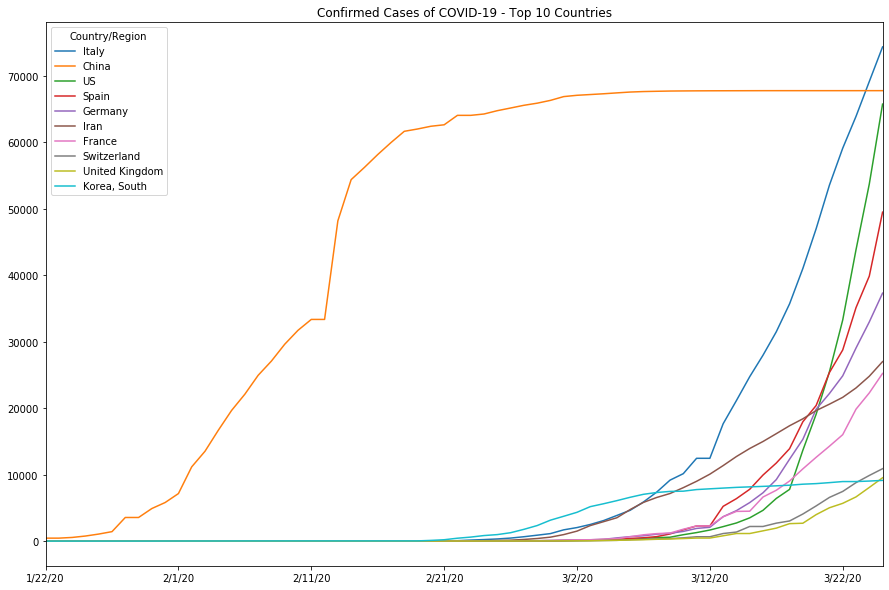

In [21]:
finalFrame.iloc[:, :topAmount].plot(figsize=(15, 10), title = "Confirmed Cases of COVID-19 - Top {} Countries".format(topAmount))

# Lets take a look at the most recent US Data 
Existing cases by day are tracked in a different CSV, labeled : 'MM-DD-YYYY.csv' in a different directory

In [15]:
dateForURL = '0' + mostRecentDate.replace('/','-')+ '20.csv' # will only work for a while
mostRecent_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + dateForURL
mostRecentFrame = pd.read_csv(mostRecent_url)

In [16]:
mostRecentFrame

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-25 23:33:19,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-25 23:33:19,30.295065,-92.414197,2,0,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-25 23:33:19,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-25 23:33:19,43.452658,-116.241552,24,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-25 23:33:19,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3415,NaN,NaN,NaN,Uzbekistan,2020-03-25 23:33:04,41.377491,64.585262,60,0,0,60,Uzbekistan
3416,NaN,NaN,NaN,Venezuela,2020-03-25 23:33:04,6.423800,-66.589700,91,0,15,76,Venezuela
3417,NaN,NaN,NaN,Vietnam,2020-03-25 23:33:04,14.058324,108.277199,141,0,17,124,Vietnam
3418,NaN,NaN,NaN,Zambia,2020-03-25 23:33:04,-13.133897,27.849332,12,0,0,12,Zambia


# More Filtering

In [17]:
# filters the dataframe to the criteria below. Try 'China'or 'Canada'
state = 'US' # try others
data = 'Confirmed' # try 'Deaths', 'Recovered', and 'Active'
selectedCountry = mostRecentFrame['Country_Region'] == (state)
hasData = mostRecentFrame[data] > 0

mostRecentFrame[selectedCountry & hasData].sort_values(by=data, ascending = False)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2067,36061.0,New York City,New York,US,2020-03-25 23:33:19,40.767273,-73.971526,17856,199,0,0,"New York City, New York, US"
3049,36119.0,Westchester,New York,US,2020-03-25 23:33:19,41.162784,-73.757417,4691,1,0,0,"Westchester, New York, US"
2046,36059.0,Nassau,New York,US,2020-03-25 23:33:19,40.740665,-73.589419,3285,17,0,0,"Nassau, New York, US"
2721,36103.0,Suffolk,New York,US,2020-03-25 23:33:19,40.883201,-72.801217,2260,20,0,0,"Suffolk, New York, US"
628,17031.0,Cook,Illinois,US,2020-03-25 23:33:19,41.841448,-87.816588,1418,14,0,0,"Cook, Illinois, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2325,20149.0,Pottawatomie,Kansas,US,2020-03-25 23:33:19,39.379257,-96.345647,1,0,0,0,"Pottawatomie, Kansas, US"
2316,5115.0,Pope,Arkansas,US,2020-03-25 23:33:19,35.448715,-93.032122,1,0,0,0,"Pope, Arkansas, US"
2315,40123.0,Pontotoc,Oklahoma,US,2020-03-25 23:33:19,34.729598,-96.683372,1,0,0,0,"Pontotoc, Oklahoma, US"
972,36033.0,Franklin,New York,US,2020-03-25 23:33:19,44.590409,-74.299260,1,0,0,0,"Franklin, New York, US"


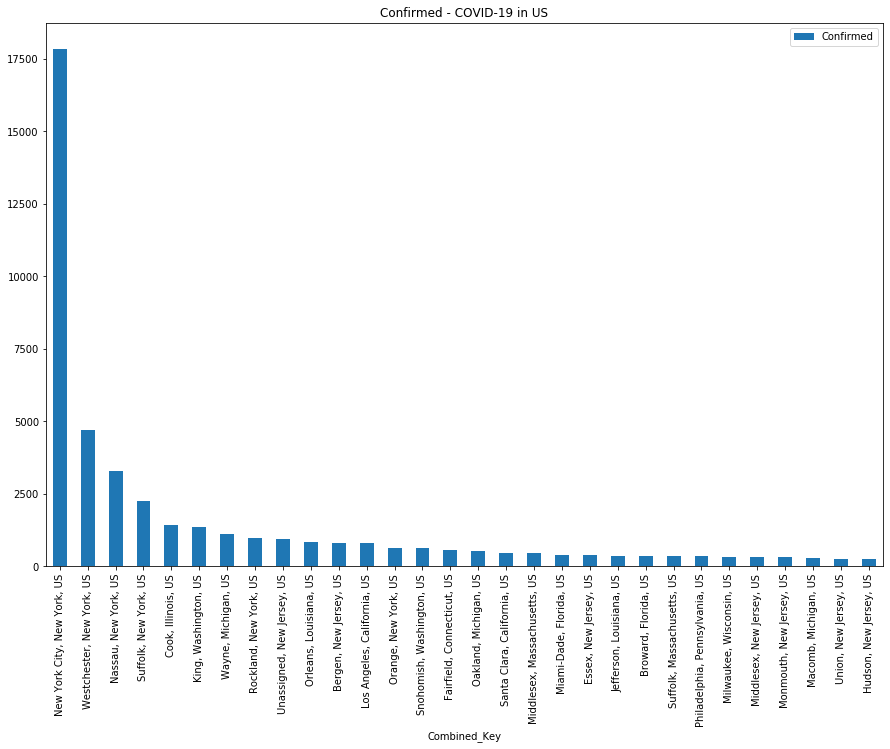

In [18]:
_[:30].plot(kind='bar', x='Combined_Key', y = data, figsize=(15, 10), title = '{} - COVID-19 in {}'.format(data,state))